In [1]:
import numpy as np
import shap
import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

shap.initjs()

In [2]:
# 加载示例数据集
data = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# 训练随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 使用SHAP解释模型预测
# TreeExplainer 用于决策树或随机森林
explainer = shap.TreeExplainer(model, feature_names=data.feature_names)
shap_values = explainer.shap_values(X_test)
# 类别数量 样本数量 特征数量
print(np.shape(shap_values))
print(shap_values)

(2, 114, 30)
[array([[-1.84891585e-02, -3.23493078e-03, -1.39603573e-02, ...,
        -5.74084212e-02,  2.34079232e-03, -1.40953675e-03],
       [ 4.36306396e-02,  7.39870260e-03,  3.90209591e-02, ...,
         9.19780694e-02, -5.94342361e-03, -1.11906066e-03],
       [ 2.76353367e-02,  1.13121690e-03,  2.78507506e-02, ...,
         7.51671405e-02,  1.38930888e-04,  2.70382944e-05],
       ...,
       [-1.27373798e-02, -1.02243978e-02, -1.42393218e-02, ...,
        -4.84384279e-02, -4.39715969e-03, -2.40741766e-04],
       [-1.49349490e-02,  1.99002501e-02, -7.49084482e-03, ...,
        -6.94377823e-02,  3.81085747e-04, -3.03570666e-03],
       [ 2.81062259e-02,  1.58906083e-02,  2.97224959e-02, ...,
         9.10253846e-02, -4.07300110e-04, -5.27328389e-04]]), array([[ 1.84891585e-02,  3.23493078e-03,  1.39603573e-02, ...,
         5.74084212e-02, -2.34079232e-03,  1.40953675e-03],
       [-4.36306396e-02, -7.39870260e-03, -3.90209591e-02, ...,
        -9.19780694e-02,  5.94342361e-03

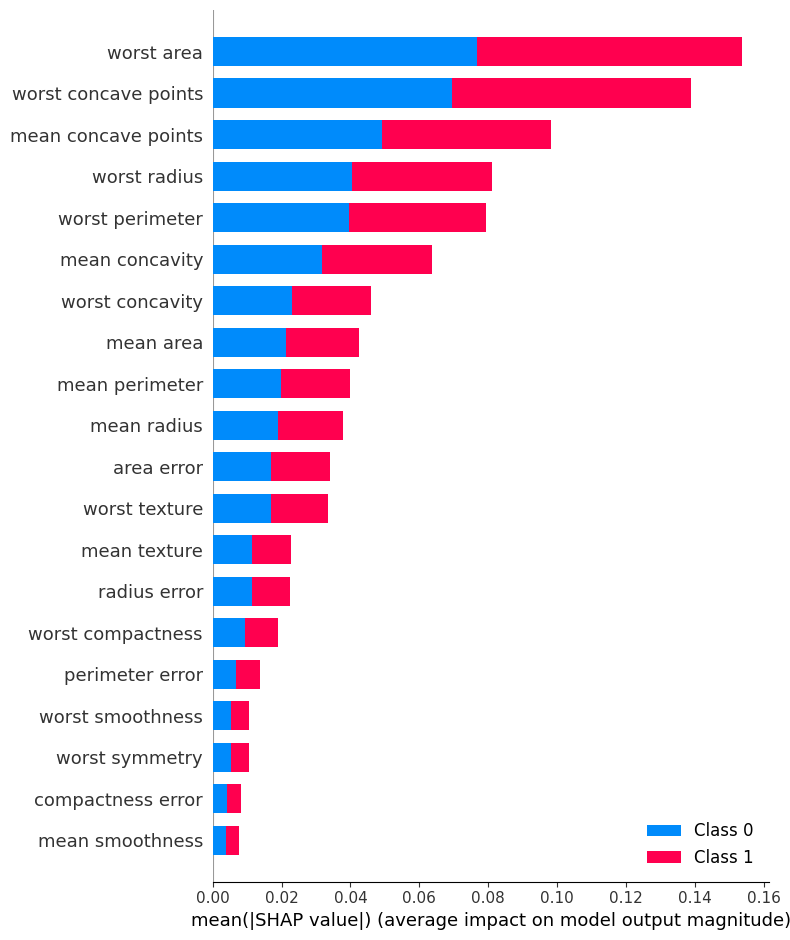

In [3]:
# 可视化解释结果
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)

In [4]:
print(explainer.expected_value)
np.mean(model.predict(X_test))

[0.36793407 0.63206593]


0.6403508771929824

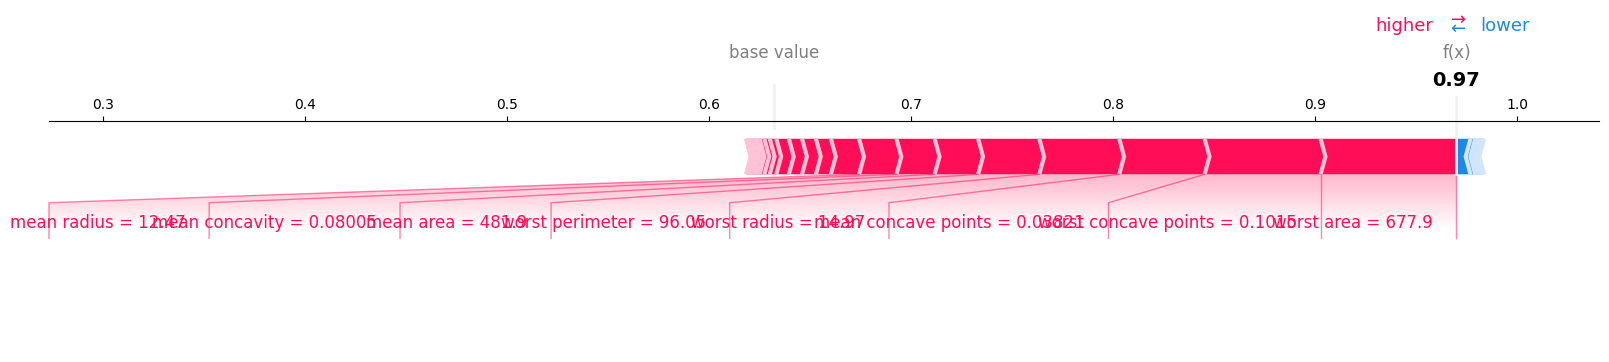

样本点： [1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
 3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
 6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
 2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
 3.014e-01 8.750e-02]
属于类别{0,1}的概率： [[0.03 0.97]]


In [5]:
# 选择一个样本点
sample = X_test[0]

# 计算单个样本的 SHAP 值
single_shap_values = explainer.shap_values(np.array([sample]))
# 生成单个样本点的 SHAP 摘要图
shap.force_plot(
    explainer.expected_value[1],
    single_shap_values[1],
    sample,
    feature_names=data.feature_names,
    matplotlib=True,
)
print("样本点：", sample)
print("属于类别{0,1}的概率：", model.predict_proba(sample.reshape(1, -1)))

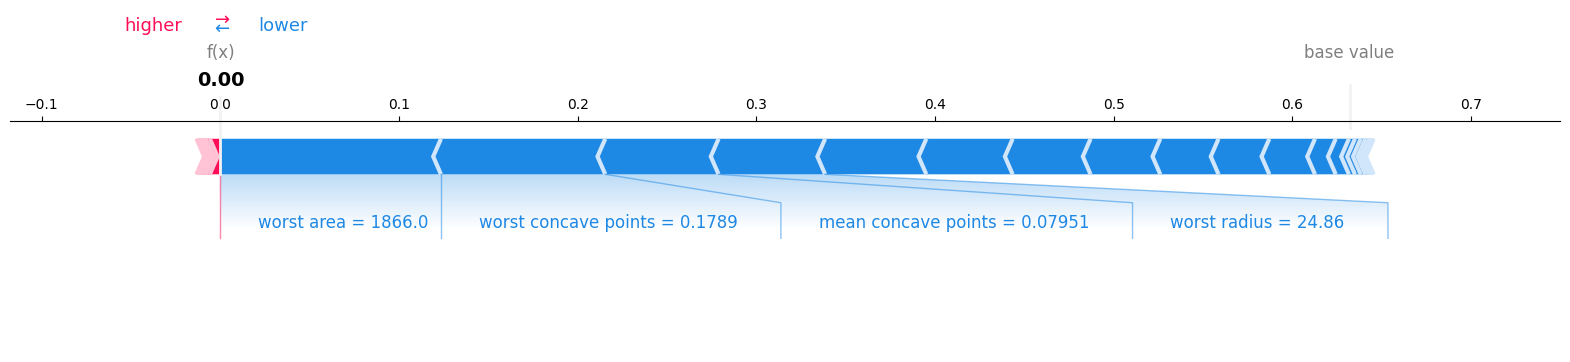

样本点： [1.894e+01 2.131e+01 1.236e+02 1.130e+03 9.009e-02 1.029e-01 1.080e-01
 7.951e-02 1.582e-01 5.461e-02 7.888e-01 7.975e-01 5.486e+00 9.605e+01
 4.444e-03 1.652e-02 2.269e-02 1.370e-02 1.386e-02 1.698e-03 2.486e+01
 2.658e+01 1.659e+02 1.866e+03 1.193e-01 2.336e-01 2.687e-01 1.789e-01
 2.551e-01 6.589e-02]
属于类别{0,1}的概率： [[1. 0.]]


In [6]:
# 选择一个样本点
sample = X_test[1]

# 计算单个样本的 SHAP 值
single_shap_values = explainer.shap_values(np.array([sample]))
# 生成单个样本点的 SHAP 摘要图
shap.force_plot(
    explainer.expected_value[1],
    single_shap_values[1],
    sample,
    feature_names=data.feature_names,
    matplotlib=True,
)
print("样本点：", sample)
print("属于类别{0,1}的概率：", model.predict_proba(sample.reshape(1, -1)))

In [7]:
shap_interaction_values = explainer.shap_interaction_values(X_test)

In [8]:
print("shap_interaction_values shape:", np.shape(shap_interaction_values))
print("X_test shape:", X_test.shape)

shap_interaction_values shape: (2, 114, 30, 30)
X_test shape: (114, 30)


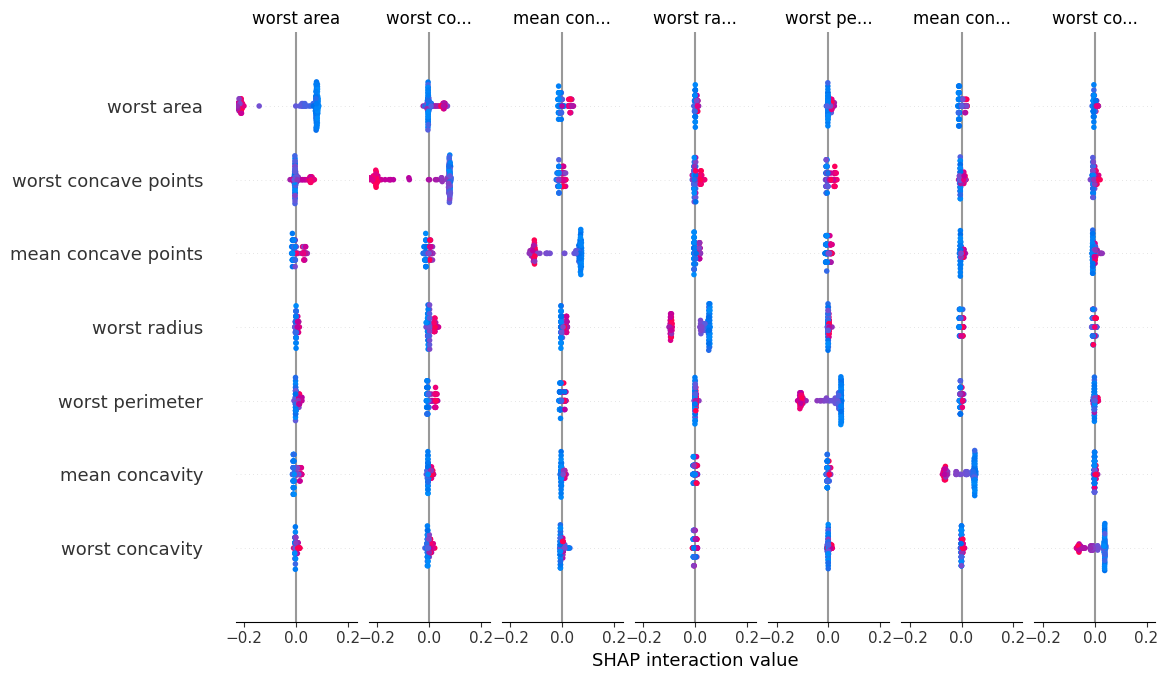

In [9]:
shap.summary_plot(shap_interaction_values[1], X_test, feature_names=data.feature_names)